# Weather Prediction Johannesburg

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from pylab import rcParams
import matplotlib
rcParams['figure.figsize'] = 18, 8
from fbprophet import Prophet
import statsmodels.api as sm

Using TensorFlow backend.
Importing plotly failed. Interactive plots will not work.


Importing the data

In [2]:
Weather=pd.read_csv('Johannesburg_weather.csv') 

In [3]:
Weather = Weather.interpolate()

In [4]:
Weather.head()

,Unnamed: 0,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,3501570,1857-01-01,18.581,1.812,Johannesburg,South Africa,26.52S,28.66E
1,3501571,1857-02-01,18.912,1.641,Johannesburg,South Africa,26.52S,28.66E
2,3501572,1857-03-01,16.969,1.573,Johannesburg,South Africa,26.52S,28.66E
3,3501573,1857-04-01,13.262,1.555,Johannesburg,South Africa,26.52S,28.66E
4,3501574,1857-05-01,10.260,1.477,Johannesburg,South Africa,26.52S,28.66E
...,...,...,...,...,...,...,...,...
1876,3503446,2013-05-01,12.154,0.271,Johannesburg,South Africa,26.52S,28.66E
1877,3503447,2013-06-01,9.982,0.435,Johannesburg,South Africa,26.52S,28.66E
1878,3503448,2013-07-01,9.755,1.226,Johannesburg,South Africa,26.52S,28.66E
1879,3503449,2013-08-01,12.214,0.531,Johannesburg,South Africa,26.52S,28.66E


Dividing the data into training and testing

In [5]:
test = Weather[1872:]

In [6]:
test

,Unnamed: 0,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1872,3503442,2013-01-01,20.673,0.779,Johannesburg,South Africa,26.52S,28.66E
1873,3503443,2013-02-01,20.939,1.106,Johannesburg,South Africa,26.52S,28.66E
1874,3503444,2013-03-01,19.033,0.815,Johannesburg,South Africa,26.52S,28.66E
1875,3503445,2013-04-01,15.075,0.337,Johannesburg,South Africa,26.52S,28.66E
1876,3503446,2013-05-01,12.154,0.271,Johannesburg,South Africa,26.52S,28.66E
1877,3503447,2013-06-01,9.982,0.435,Johannesburg,South Africa,26.52S,28.66E
1878,3503448,2013-07-01,9.755,1.226,Johannesburg,South Africa,26.52S,28.66E
1879,3503449,2013-08-01,12.214,0.531,Johannesburg,South Africa,26.52S,28.66E
1880,3503450,2013-09-01,12.214,0.531,Johannesburg,South Africa,26.52S,28.66E


Text(0.5, 0, 'Time')

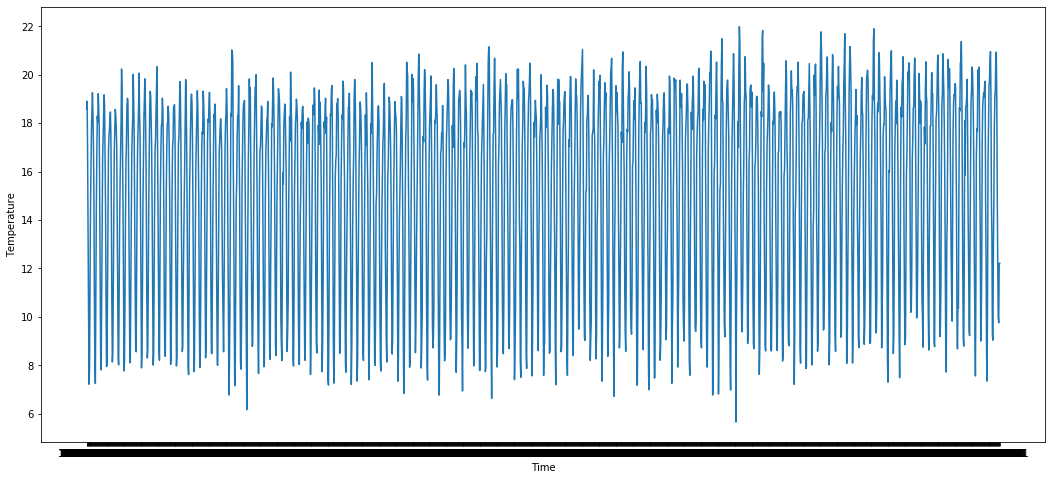

In [7]:
plt.plot(Weather['dt'],Weather['AverageTemperature'])
plt.ylabel('Temperature')
plt.xlabel('Time')
plt.savefig('Temperature')

Indexing the temperature data

In [8]:
# We define a dataframe that only contains the date and closing price.
data = Weather.sort_index(ascending=True, axis=0)
AverageTemperature = pd.DataFrame(index=range(0,len(Weather)),columns=['dt', 'AverageTemperature'])
for i in range(0,len(data)):
    AverageTemperature['dt'][i] = data['dt'][i]
    AverageTemperature['AverageTemperature'][i] = data['AverageTemperature'][i]

In [9]:
AverageTemperature

,dt,AverageTemperature
0,1857-01-01,18.581
1,1857-02-01,18.912
2,1857-03-01,16.969
3,1857-04-01,13.262
4,1857-05-01,10.26
...,...,...
1876,2013-05-01,12.154
1877,2013-06-01,9.982
1878,2013-07-01,9.755
1879,2013-08-01,12.214


In [10]:
#setting index
AverageTemperature.index = AverageTemperature.dt
AverageTemperature.drop('dt', axis=1, inplace=True)

In [11]:
AverageTemperature

,AverageTemperature
dt,
1857-01-01,18.581
1857-02-01,18.912
1857-03-01,16.969
1857-04-01,13.262
1857-05-01,10.26
...,...
2013-05-01,12.154
2013-06-01,9.982
2013-07-01,9.755


Scaling the data. 

In [13]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(AverageTemperature)

In [14]:
x_train, y_train = [], []
for i in range(60,len(Weather)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [15]:
x_train

array([[[0.79146513],
        [0.81173085],
        [0.69276924],
        ...,
        [0.68603441],
        [0.74015796],
        [0.7906692 ]],

       [[0.81173085],
        [0.69276924],
        [0.46580542],
        ...,
        [0.74015796],
        [0.7906692 ],
        [0.77768934]],

       [[0.69276924],
        [0.46580542],
        [0.28200576],
        ...,
        [0.7906692 ],
        [0.77768934],
        [0.74719892]],

       ...,

       [[0.21869834],
        [0.45607053],
        [0.62070655],
        ...,
        [0.57680769],
        [0.39796731],
        [0.264985  ]],

       [[0.45607053],
        [0.62070655],
        [0.81062879],
        ...,
        [0.39796731],
        [0.264985  ],
        [0.25108676]],

       [[0.62070655],
        [0.81062879],
        [0.83726198],
        ...,
        [0.264985  ],
        [0.25108676],
        [0.40164085]]])

Creating LSTM.

In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 101s - loss: 0.0168


Making predictions.

In [17]:
inputs = AverageTemperature[len(AverageTemperature) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Predict_Temperature = model.predict(X_test)
Predict_Temperature  = scaler.inverse_transform(Predict_Temperature )

In [18]:
Predict_Temperature

array([[19.514963],
       [18.721077],
       [16.914154],
       [13.733218],
       [10.028613],
       [ 8.233746],
       [ 9.668251],
       [13.085417],
       [16.350243]], dtype=float32)

Real Temperature

In [23]:
Real_Temperature = AverageTemperature[1872:]

In [24]:
Real_Temperature 

,AverageTemperature
dt,
2013-01-01,20.673
2013-02-01,20.939
2013-03-01,19.033
2013-04-01,15.075
2013-05-01,12.154
2013-06-01,9.982
2013-07-01,9.755
2013-08-01,12.214
2013-09-01,12.214


Plotting the predicted temperature and real temperature.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


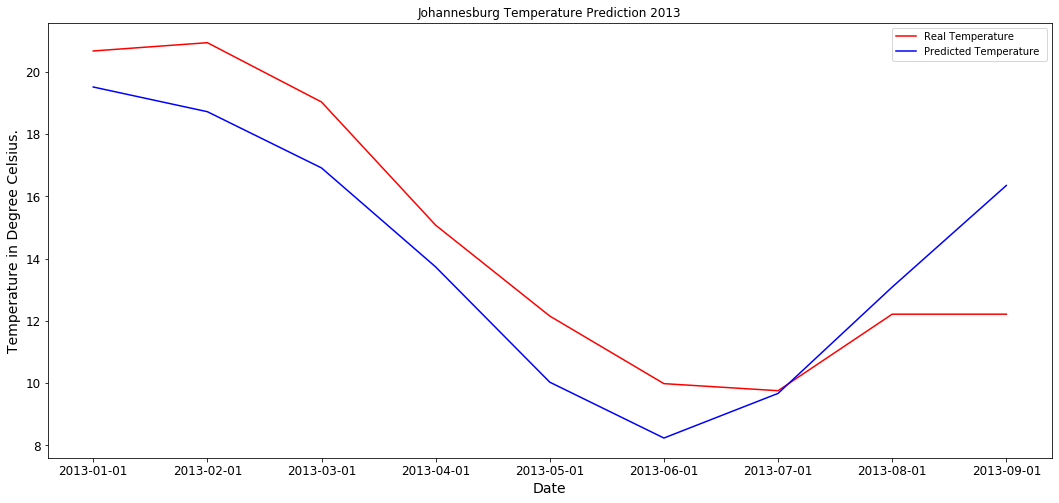

In [88]:
plt.plot(Real_Temperature, color = 'red', label = 'Real Temperature')
plt.plot(Predict_Temperature, color = 'blue', label = 'Predicted Temperature ')
plt.title('Johannesburg Temperature Prediction 2013')
plt.xlabel('Date')
plt.ylabel('Temperature in Degree Celsius.')
plt.legend()
#plt.show()
plt.savefig('JoBurg_Temp_2013')

# Facebook Prophet

In [29]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [34]:
from fbprophet import Prophet

In [35]:
Weather_1 =pd.read_csv('Johannesburg_weather.csv') 

In [36]:
Weather_1 = Weather.interpolate()

In [41]:
# We define a dataframe that only contains the date and closing price.
data = Weather_1.sort_index(ascending=True, axis=0)
AverageTemperature = pd.DataFrame(index=range(0,len(Weather_1)),columns=['dt', 'AverageTemperature'])
for i in range(0,len(data)):
    AverageTemperature['dt'][i] = data['dt'][i]
    AverageTemperature['AverageTemperature'][i] = data['AverageTemperature'][i]

In [42]:
AverageTemperature

,dt,AverageTemperature
0,1857-01-01,18.581
1,1857-02-01,18.912
2,1857-03-01,16.969
3,1857-04-01,13.262
4,1857-05-01,10.26
...,...,...
1876,2013-05-01,12.154
1877,2013-06-01,9.982
1878,2013-07-01,9.755
1879,2013-08-01,12.214


In [66]:
AverageTemperature = AverageTemperature.rename(columns={'dt': 'ds', 'AverageTemperature': 'y'})
AverageTemperature_model = Prophet(interval_width=0.95)
AverageTemperature_model.fit(AverageTemperature)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
AverageTemperature_forecast = AverageTemperature_model.make_future_dataframe(periods=36, freq='MS')
AverageTemperature_forecast = AverageTemperature_model.predict(AverageTemperature_forecast)

<Figure size 1296x432 with 0 Axes>

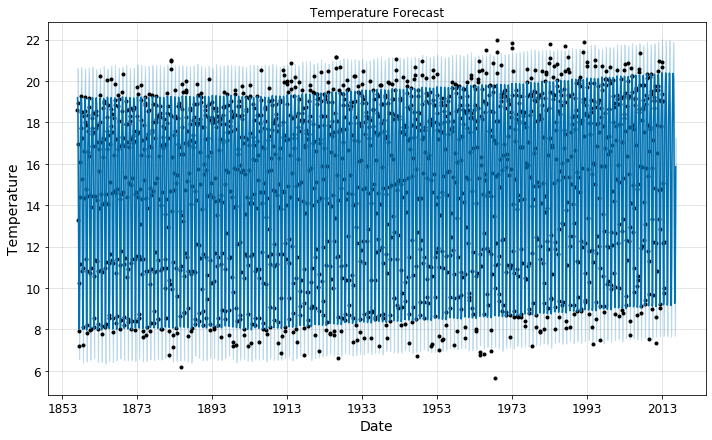

In [89]:
plt.figure(figsize=(18, 6))
AverageTemperature_model.plot(AverageTemperature_forecast, xlabel = 'Date', ylabel = 'Temperature')
plt.title('Temperature Forecast');
plt.savefig('Prophet_Temp')

In [69]:
AverageTemperature_forecast[1881:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1881,2013-10-01,15.836076,16.352481,19.569459,15.836076,15.836076,2.065392,2.065392,2.065392,2.065392,2.065392,2.065392,0.0,0.0,0.0,17.901467
1882,2013-11-01,15.837173,17.404580,20.491064,15.837173,15.837173,3.125322,3.125322,3.125322,3.125322,3.125322,3.125322,0.0,0.0,0.0,18.962495
1883,2013-12-01,15.838235,18.337121,21.305927,15.838235,15.838235,3.962272,3.962272,3.962272,3.962272,3.962272,3.962272,0.0,0.0,0.0,19.800508
1884,2014-01-01,15.839333,18.944440,21.928286,15.839324,15.839333,4.546741,4.546741,4.546741,4.546741,4.546741,4.546741,0.0,0.0,0.0,20.386073
1885,2014-02-01,15.840430,18.742643,21.746864,15.840397,15.840430,4.298302,4.298302,4.298302,4.298302,4.298302,4.298302,0.0,0.0,0.0,20.138732
1886,2014-03-01,15.841421,17.360387,20.391339,15.841371,15.841421,2.966613,2.966613,2.966613,2.966613,2.966613,2.966613,0.0,0.0,0.0,18.808034
1887,2014-04-01,15.842519,14.280024,17.234780,15.842428,15.842521,-0.066266,-0.066266,-0.066266,-0.066266,-0.066266,-0.066266,0.0,0.0,0.0,15.776253
1888,2014-05-01,15.843581,10.703572,13.765979,15.843432,15.843609,-3.608205,-3.608205,-3.608205,-3.608205,-3.608205,-3.608205,0.0,0.0,0.0,12.235375
1889,2014-06-01,15.844678,7.697516,10.704457,15.844502,15.844777,-6.673914,-6.673914,-6.673914,-6.673914,-6.673914,-6.673914,0.0,0.0,0.0,9.170764
1890,2014-07-01,15.845740,7.671757,10.843162,15.845526,15.845887,-6.543804,-6.543804,-6.543804,-6.543804,-6.543804,-6.543804,0.0,0.0,0.0,9.301936


<Figure size 1296x432 with 0 Axes>

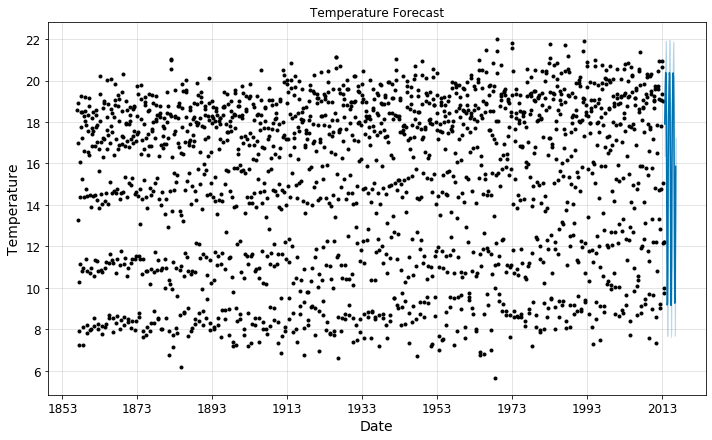

In [90]:
plt.figure(figsize=(18, 6))
AverageTemperature_model.plot(AverageTemperature_forecast[1881:], xlabel = 'Date', ylabel = 'Temperature')
plt.title('Temperature Forecast');
plt.savefig('Temp_Prop')

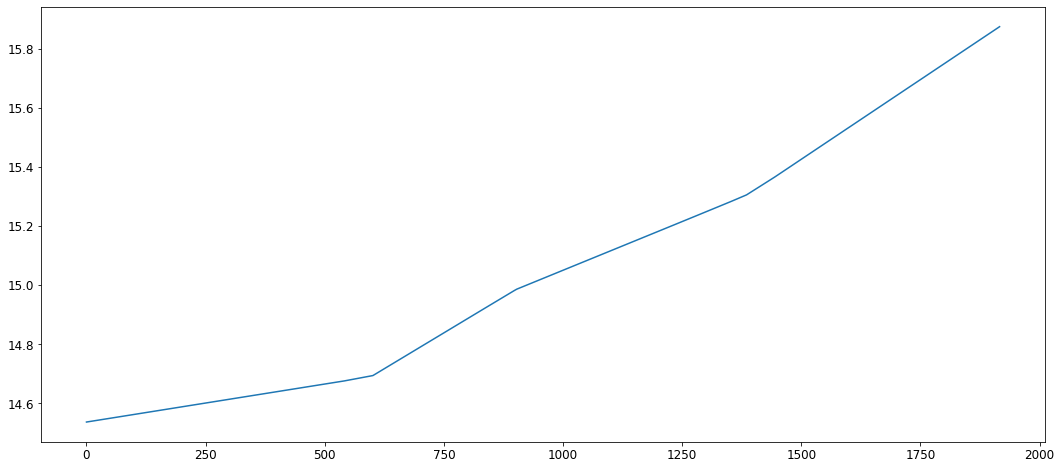

In [74]:
plt.plot(AverageTemperature_forecast['trend'])

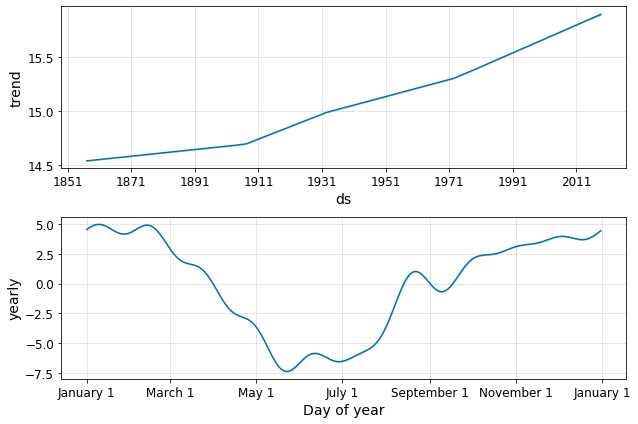

In [87]:
Temperature_model.plot_components(Temperature_forecast);